<a href="https://colab.research.google.com/github/TakahashixD/TCC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score


In [ ]:
url = 'https://drive.google.com/file/d/1oz06u5yGBBXj_XdmeaazfEeCV5H9-s6E/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
amostrasECG = pd.read_csv(path, decimal=',')


In [ ]:
amostrasECG.head()

,Data_ID,Sample,CAN,NNmean,NNmedian,NNmode,NNvariance,NNskew,NNkurt,NNiqr,SDNN,CV,RMSSD,SDSD,NN50,pNN50,pNN50_pr,NN20,pNN20,pNN20_pr,hr_change,HTI,TINN,SI,vlf_lomb_ms2,lf_lomb_ms2,hf_lomb_ms2,vlf_lomb_log,lf_lomb_log,hf_lomb_log,ttlpwr_lomb_ms2,lf_hf_lomb,power_lf_lomb,power_hf_lomb,lf_nu_lomb,hf_nu_lomb,vlf_welch,lf_welch,hf_welch,ttlpwr_welch,lfhf_welch,power_vlf_welch,power_lf_welch,power_hf_welch,lf_nu_welch,hf_nu_welch
0,1,1,0,998.9748,982.0,926,5.061686,0.487888,1.994919,128.5,71.14553,7.121854,37.00115,24.64188,25,0.211864,21.18644,25,0.449153,44.915250,16.278700,9.916667,281.2500,18.25577,3143.357382,493.779638,243.069552,8.053047,6.202089,5.493348,4.690067,2.03,12.72560,6.264346,0.670123,0.329877,2.495890e+03,5.138664e+02,1.863930e+02,7.091818e+01,2.76,78.090529,16.077673,5.831798,0.733823,0.266177
1,1,2,0,1063.4640,1070.0,1072,1.323963,-0.384770,3.340551,48.0,36.38630,3.421488,43.06793,29.15482,25,0.225225,22.52252,25,0.495495,49.549550,11.611480,8.000000,218.7500,26.70227,230.800549,458.412658,430.105263,5.441554,6.127770,6.064030,1.143685,1.07,40.95462,38.425640,0.515930,0.484070,1.561068e+02,3.979329e+02,3.496799e+02,3.336160e+00,1.14,17.273807,44.032784,38.693409,0.532271,0.467729
2,1,3,0,1090.8810,1100.0,1116,1.127069,-0.744150,3.582204,40.5,33.57185,3.077499,35.78175,25.59099,13,0.120370,12.03704,13,0.425926,42.592590,8.792589,5.736842,179.6875,44.09472,281.466027,402.010128,348.147857,5.640012,5.996477,5.852627,1.044656,1.15,38.96867,33.747550,0.535901,0.464099,1.944236e+02,3.053595e+02,2.355044e+02,3.446568e+00,1.30,26.441844,41.529272,32.028884,0.564577,0.435423
3,1,4,0,1108.0000,1113.0,1074,1.238458,-0.065650,3.522023,45.0,35.19173,3.176149,47.35053,28.48701,25,0.301205,30.12048,25,0.662651,66.265060,9.643202,7.000000,210.9375,30.42447,119.613359,244.379678,835.745648,4.784265,5.498723,6.728324,1.200052,0.29,20.36941,69.660640,0.226251,0.773749,1.230000e+08,1.996077e+07,1.015402e+06,2.883639e+06,19.66,85.424567,13.869874,0.705558,0.951593,0.048407
4,2,5,1,665.4889,666.0,666,0.116654,0.411033,3.146737,12.0,10.80063,1.622961,7.54132,4.58135,0,0.000000,0.00000,0,0.005587,0.558659,7.002613,3.396226,54.6875,404.21370,58.259349,34.094460,10.213010,4.064905,3.529135,2.323662,0.102821,3.34,33.24122,9.957421,0.769497,0.230503,4.123639e+01,2.868352e+01,7.929202e+00,8.131882e-01,3.62,52.969634,36.845019,10.185347,0.783430,0.216570


In [ ]:
amostrasECG

,Data_ID,Sample,CAN,NNmean,NNmedian,NNmode,NNvariance,NNskew,NNkurt,NNiqr,SDNN,CV,RMSSD,SDSD,NN50,pNN50,pNN50_pr,NN20,pNN20,pNN20_pr,hr_change,HTI,TINN,SI,vlf_lomb_ms2,lf_lomb_ms2,hf_lomb_ms2,vlf_lomb_log,lf_lomb_log,hf_lomb_log,ttlpwr_lomb_ms2,lf_hf_lomb,power_lf_lomb,power_hf_lomb,lf_nu_lomb,hf_nu_lomb,vlf_welch,lf_welch,hf_welch,ttlpwr_welch,lfhf_welch,power_vlf_welch,power_lf_welch,power_hf_welch,lf_nu_welch,hf_nu_welch
0,1,1,0,998.9748,982.0,926,5.061686,0.487888,1.994919,128.50,71.14553,7.121854,37.00115,24.641880,25,0.211864,21.186440,25,0.449153,44.915250,16.278700,9.916667,281.2500,18.25577,3143.357382,493.779638,243.069552,8.053047,6.202089,5.493348,4.690067,2.03,12.72560,6.264346,0.670123,0.329877,2.495890e+03,5.138664e+02,1.863930e+02,7.091818e+01,2.76,78.090529,16.077673,5.831798,0.733823,0.266177
1,1,2,0,1063.4640,1070.0,1072,1.323963,-0.384770,3.340551,48.00,36.38630,3.421488,43.06793,29.154820,25,0.225225,22.522520,25,0.495495,49.549550,11.611480,8.000000,218.7500,26.70227,230.800549,458.412658,430.105263,5.441554,6.127770,6.064030,1.143685,1.07,40.95462,38.425640,0.515930,0.484070,1.561068e+02,3.979329e+02,3.496799e+02,3.336160e+00,1.14,17.273807,44.032784,38.693409,0.532271,0.467729
2,1,3,0,1090.8810,1100.0,1116,1.127069,-0.744150,3.582204,40.50,33.57185,3.077499,35.78175,25.590990,13,0.120370,12.037040,13,0.425926,42.592590,8.792589,5.736842,179.6875,44.09472,281.466027,402.010128,348.147857,5.640012,5.996477,5.852627,1.044656,1.15,38.96867,33.747550,0.535901,0.464099,1.944236e+02,3.053595e+02,2.355044e+02,3.446568e+00,1.30,26.441844,41.529272,32.028884,0.564577,0.435423
3,1,4,0,1108.0000,1113.0,1074,1.238458,-0.065650,3.522023,45.00,35.19173,3.176149,47.35053,28.487010,25,0.301205,30.120480,25,0.662651,66.265060,9.643202,7.000000,210.9375,30.42447,119.613359,244.379678,835.745648,4.784265,5.498723,6.728324,1.200052,0.29,20.36941,69.660640,0.226251,0.773749,1.230000e+08,1.996077e+07,1.015402e+06,2.883639e+06,19.66,85.424567,13.869874,0.705558,0.951593,0.048407
4,2,5,1,665.4889,666.0,666,0.116654,0.411033,3.146737,12.00,10.80063,1.622961,7.54132,4.581350,0,0.000000,0.000000,0,0.005587,0.558659,7.002613,3.396226,54.6875,404.21370,58.259349,34.094460,10.213010,4.064905,3.529135,2.323662,0.102821,3.34,33.24122,9.957421,0.769497,0.230503,4.123639e+01,2.868352e+01,7.929202e+00,8.131882e-01,3.62,52.969634,36.845019,10.185347,0.783430,0.216570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,61,264,0,877.4776,876.0,866,0.201132,0.332123,3.001040,17.25,14.18210,1.616235,10.51838,6.952318,0,0.000000,0.000000,0,0.090909,9.090909,5.360403,3.941176,70.3125,205.97170,79.456872,75.839943,26.192639,4.375214,4.328625,3.265478,0.182295,2.90,41.78752,14.432040,0.743291,0.256709,3.059508e+01,8.085322e+01,1.647460e+01,1.161971e+00,4.91,23.916814,63.204650,12.878536,0.830731,0.169269
264,61,265,0,880.6269,878.0,875,0.142359,0.414384,2.687222,16.75,11.93141,1.354877,11.23644,6.799304,0,0.000000,0.000000,0,0.090909,9.090909,4.251011,3.526316,62.5000,258.38910,19.023961,71.905308,34.001266,2.945699,4.275350,3.526398,0.125088,2.11,57.55623,27.216140,0.678950,0.321050,9.206938e+00,6.051806e+01,3.450965e+01,3.833358e-01,1.75,8.832896,58.059450,33.107653,0.636846,0.363154
265,61,266,0,872.1029,869.5,875,0.472959,0.865734,3.963297,24.00,21.74763,2.493700,10.19950,6.632193,0,0.000000,0.000000,0,0.044776,4.477612,8.186593,4.250000,109.3750,123.70680,234.536673,194.417168,21.472129,5.457612,5.270006,3.066756,0.450543,9.05,43.16296,4.767072,0.900541,0.099459,8.416001e+01,2.176737e+02,2.077198e+01,3.181234e+00,10.48,26.087578,67.473608,6.438814,0.912886,0.087114
266,61,267,0,877.6866,878.0,886,0.128582,-0.485180,3.777581,14.75,11.33940,1.291965,10.13918,5.885484,0,0.000000,0.000000,0,0.030303,3.030303,4.403139,2.791667,62.5000,326.38630,30.558999,62.021099,18.598504,3.419659,4.127475,2.923081,0.112509,

In [ ]:
amostrasECG.isnull().sum()

Data_ID            0
Sample             0
CAN                0
NNmean             0
NNmedian           0
NNmode             0
NNvariance         0
NNskew             0
NNkurt             0
NNiqr              0
SDNN               0
CV                 0
RMSSD              0
SDSD               0
NN50               0
pNN50              0
pNN50_pr           0
NN20               0
pNN20              0
pNN20_pr           0
hr_change          0
HTI                0
TINN               0
SI                 0
vlf_lomb_ms2       0
lf_lomb_ms2        0
hf_lomb_ms2        0
vlf_lomb_log       0
lf_lomb_log        0
hf_lomb_log        0
ttlpwr_lomb_ms2    0
lf_hf_lomb         0
power_lf_lomb      0
power_hf_lomb      0
lf_nu_lomb         0
hf_nu_lomb         0
vlf_welch          0
lf_welch           0
hf_welch           0
ttlpwr_welch       0
lfhf_welch         0
power_vlf_welch    0
power_lf_welch     0
power_hf_welch     0
lf_nu_welch        0
hf_nu_welch        0
dtype: int64

Matriz de correlação
Para cada feature X do meu dataset, ele irá mostrar como ela se relaciona com a feature Y. A partir dessa visualização, você pode saber quais features possuem uma correlação positiva — quando se movem na mesma direção, ou correlação negativa quando se movem em direções opostas.

In [ ]:
amostrasECG.drop(['Data_ID', 'Sample'], axis=1, inplace=True)

In [ ]:
amostrasECG = amostrasECG.rename(columns= {'CAN': 'NAC'})

In [ ]:
total = amostrasECG['NAC'].value_counts().sum()
total

268

In [ ]:
def my_fmt(x):
  return '{:.0f}\n({:.2f}%)'.format(total*x/100, x)

(-1.0999994503928798,
 1.0999999738282324,
 -1.0999992188323477,
 1.0999998663323278)

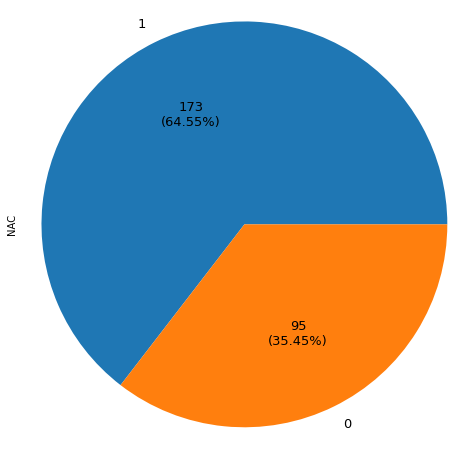

In [ ]:
amostrasECG['NAC'].value_counts().plot(kind='pie', autopct=my_fmt, figsize=(8,8), textprops={'fontsize': 13})
plt.axis('equal')

In [ ]:
df = amostrasECG.drop(['vlf_lomb_ms2', 'lf_lomb_ms2',	'hf_lomb_ms2',	
                 'vlf_lomb_log',	'lf_lomb_log',	'hf_lomb_log',	'ttlpwr_lomb_ms2',	'lf_hf_lomb',	'power_lf_lomb',	
                 'power_hf_lomb',	'lf_nu_lomb',	'hf_nu_lomb'], axis=1)

In [ ]:
def format_annotation(value):
    if value == 1:
        return ""
    else:
        return "{:.1f}".format(value)

<Axes: >

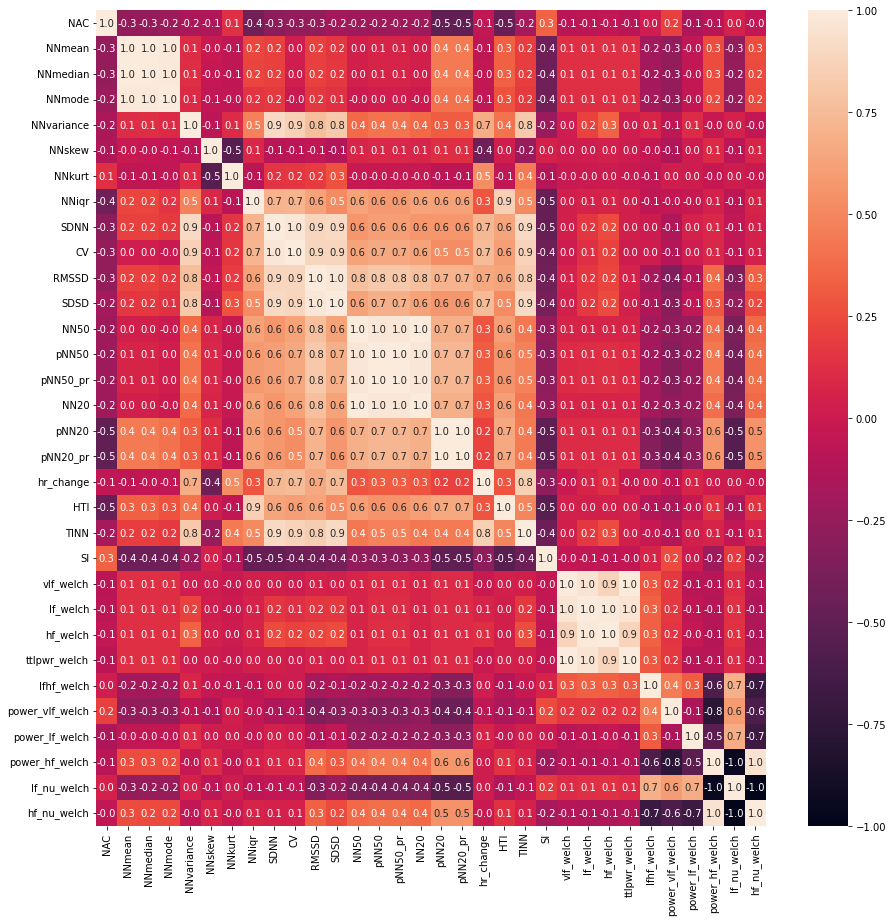

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, fmt=".1f", annot_kws={"size": 10})

In [ ]:
y = amostrasECG['NAC']
amostrasECG.drop(['NAC'], axis=1, inplace=True)
X = amostrasECG
df = X.drop(['vlf_lomb_ms2', 'lf_lomb_ms2',	'hf_lomb_ms2',	
                 'vlf_lomb_log',	'lf_lomb_log',	'hf_lomb_log',	'ttlpwr_lomb_ms2',	'lf_hf_lomb',	'power_lf_lomb',	
                 'power_hf_lomb',	'lf_nu_lomb',	'hf_nu_lomb'], axis=1)

In [ ]:
XWelch = X.drop(['NN50', 'pNN50_pr', 'pNN20_pr', 'NN20', 'NNmedian', 'NNmode', 'vlf_welch', 'vlf_lomb_ms2', 'lf_lomb_ms2',	'hf_lomb_ms2',	
                 'vlf_lomb_log',	'lf_lomb_log',	'hf_lomb_log',	'ttlpwr_lomb_ms2',	'lf_hf_lomb',	'power_lf_lomb',	
                 'power_hf_lomb',	'lf_nu_lomb',	'hf_nu_lomb'], axis=1)

#XLomb =X.drop(['pNN50', 'NN50', 'pNN20', 'NN20', 'NNmedian', 'NNmode', 'vlf_welch',	'lf_welch',	'hf_welch',	
       #        'ttlpwr_welch',	'lfhf_welch',	'power_vlf_welch',	'power_lf_welch',
        #       'power_hf_welch',	'lf_nu_welch',	'hf_nu_welch'], axis=1)

In [ ]:
def Kbest(k, data, score_func):
  best = SelectKBest(score_func, k=k).fit(data, y)
  X_best = best.transform(data)
  cols = data.columns[best.get_support()]
  best_data = pd.DataFrame(X_best, columns=cols)
  return best_data

score_func = f_classif
score_func2 = mutual_info_classif
sc = StandardScaler()
cols = XWelch.columns.values
XWelch = sc.fit_transform(XWelch)
XWelch = pd.DataFrame(XWelch, columns=cols)
bestWelch5A = Kbest(5, XWelch, score_func)
bestWelch10A = Kbest(10, XWelch, score_func)
bestWelch15A = Kbest(15, XWelch, score_func)
bestWelch5M = Kbest(5, XWelch, score_func2)
bestWelch10M = Kbest(10, XWelch, score_func2)
bestWelch15M = Kbest(15, XWelch, score_func2)


Recursive Feature Elimination (Eliminação recursiva de atributos)
É baseada na ideia de repetidamente construir um modelo e escolher o melhor ou pior atributo, separando esse atributo e repetindo o processo com os demais. Esse processo é aplicado até que todos os atributs no dataset foram utilizados. Os atributos são, então, ranqueados de acordo com a ordem de eliminação. Assim sendo, isso representa um processo guloso de otimização para encontrar o melhor subconjunto de atributos.

In [ ]:
def f_RFE(df):
  lr = SVC(kernel="linear")
  rfe = RFE(lr, step=1)
  rfe.fit(df, y)
  print("Ranking dos atributos")
  result = sorted(zip(rfe.ranking_,  list(df.columns)))
  for i in result:
    print(i)

In [ ]:
f_RFE(XWelch)

Ranking dos atributos
(1, 'HTI')
(1, 'NNkurt')
(1, 'NNmean')
(1, 'RMSSD')
(1, 'SI')
(1, 'TINN')
(1, 'hf_welch')
(1, 'pNN20')
(1, 'pNN50')
(1, 'power_hf_welch')
(1, 'power_lf_welch')
(1, 'ttlpwr_welch')
(2, 'NNvariance')
(3, 'CV')
(4, 'NNskew')
(5, 'hr_change')
(6, 'hf_nu_welch')
(7, 'lf_nu_welch')
(8, 'lfhf_welch')
(9, 'NNiqr')
(10, 'lf_welch')
(11, 'power_vlf_welch')
(12, 'SDSD')
(13, 'SDNN')


In [ ]:
rfeWelch = XWelch.drop(['power_vlf_welch', 'hf_nu_welch', 'hr_change', 'lf_nu_welch', 'SDNN',
                            'NNvariance', 'CV', 'NNmean', 'lf_welch', 'NNiqr', 'NNskew', 'SDSD', 'lfhf_welch'], axis=1)
rfeWelch

,NNkurt,RMSSD,pNN50,pNN20,HTI,TINN,SI,hf_welch,ttlpwr_welch,power_lf_welch,power_hf_welch
0,-0.396089,0.394593,0.940780,0.829104,1.752680,0.836291,-0.687107,-0.084735,-0.062602,-1.329698,-1.197947
1,-0.257617,0.621203,1.032257,1.020522,1.040189,0.401517,-0.655921,-0.082453,-0.062987,0.490612,0.184616
2,-0.232749,0.349045,0.314356,0.733163,0.198895,0.129783,-0.591706,-0.084049,-0.062986,0.327595,-0.095775
3,-0.238942,0.781169,1.552463,1.710970,0.668455,0.347170,-0.642178,14.105743,16.333075,-1.473460,-1.413619
4,-0.277561,-0.705809,-0.509771,-1.003072,-0.671192,-0.739765,0.737908,-0.087230,-0.063001,0.022578,-1.014783
...,...,...,...,...,...,...,...,...,...,...,...
263,-0.292554,-0.594608,-0.509771,-0.650644,-0.468616,-0.631071,0.005969,-0.087110,-0.062999,1.738998,-0.901474
264,-0.324848,-0.567787,-0.509771,-0.650644,-0.622833,-0.685418,0.199501,-0.086858,-0.063003,1.403965,-0.050389
265,-0.193533,-0.606519,-0.509771,-0.841200,-0.353815,-0.359338,-0.297766,-0.087050,-0.062987,2.016973,-1.172408
266,-0.212644,-0.608772,-0.509771,-0.900981,-0.895928,-0.685418,0.450557,-0.087047,-0.063002,1.282148,-0.338797


In [ ]:
def plot_tree(fitted_tree, feature_name):
  import graphviz
  from sklearn.tree import export_graphviz
  label_names = ['0', '1']
  dot_data = export_graphviz(clf, out_file=None,
                             feature_names=feature_name,
                             class_names=label_names,
                             filled=True, rounded=True,
                             special_characters=True)
  
  graph = graphviz.Source(dot_data)
  return graph

Split test e Feature scaling

Perform standard scalar normalization to normalize our feature set.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(XWelch, y, train_size = 0.7, random_state=42) #Split 70% train e 30% test
X_train5A, X_test5A, y_train5A, y_test5A = train_test_split(bestWelch5A, y, train_size = 0.7, random_state=42)
X_train10A, X_test10A, y_train10A, y_test10A = train_test_split(bestWelch10A, y, train_size = 0.7, random_state=42)
X_train15A, X_test15A, y_train15A, y_test15A = train_test_split(bestWelch15A, y, train_size = 0.7, random_state=42)
X_train5M, X_test5M, y_train5M, y_test5M = train_test_split(bestWelch5M, y, train_size = 0.7, random_state=42)
X_train10M, X_test10M, y_train10M, y_test10M = train_test_split(bestWelch10M, y, train_size = 0.7, random_state=42)
X_train15M, X_test15M, y_train15M, y_test15M = train_test_split(bestWelch15M, y, train_size = 0.7, random_state=42)
X_trainRFE, X_testRFE, y_trainRFE, y_testRFE = train_test_split(rfeWelch, y, train_size = 0.7, random_state=42)
#y_train['NAC'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(8,8))
#plt.axis('equal')

In [ ]:
sm = SMOTE()

In [ ]:

X_res, y_res = sm.fit_resample(X_train, y_train)
X_res5A, y_res5A = sm.fit_resample(X_train5A, y_train5A)
X_res10A, y_res10A = sm.fit_resample(X_train10A, y_train10A)
X_res15A, y_res15A = sm.fit_resample(X_train15A, y_train15A)
X_res5M, y_res5M = sm.fit_resample(X_train5M, y_train5M)
X_res10M, y_res10M = sm.fit_resample(X_train10M, y_train10M)
X_res15M, y_res15M = sm.fit_resample(X_train15M, y_train15M)
X_resRFE, y_resRFE = sm.fit_resample(X_trainRFE, y_trainRFE)
#y_res['NAC'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(8,8))
#plt.axis('equal')

In [ ]:
#plot_tree(clf, bestWelch.columns.values)

In [ ]:
#modelo MLP
mlp = MLPClassifier()

#parâmetros a serem avaliados
param_grid = {'hidden_layer_sizes': [(100,), (100, 100,), (100, 100, 100)],
              'alpha': [0.0001, 0.001, 0.01],
              'solver': ['lbfgs', 'adam', 'sgd'],
              'max_iter': [1000, 2000, 3000, 4000]}
def gradePesquisa(Xtrain, Xtest, ytrain, ytest):
  # Execute a pesquisa de grade
  grid_search = GridSearchCV(mlp, param_grid, cv=5)
  grid_search.fit(Xtrain, ytrain)

  # Exibe os melhores parâmetros encontrados
  print("Melhores parâmetros encontrados: ", grid_search.best_params_)

  # Avalia o desempenho do modelo com os dados de teste
  score = grid_search.score(Xtest, ytest)
  print("Desempenho do modelo com dados de teste: ", score)


In [ ]:
#predict = clf.predict(X_test)
#print("Accuracy = {0:.3f}".format(accuracy_score(y_test, predict)))
#print("F1-Score = {0:.3f}".format(f1_score(y_test, predict)))
#print("recall-Score = {0:.3f}".format(recall_score(y_test, predict)))
#print("precision-Score = {0:.3f}".format(precision_score(y_test, predict)))

In [ ]:
DT_params = [{}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
SVM_params = [{"kernel":"linear"}]
MLP_params = [{"max_iter":1000}]
models = [
    ['DT', tree.DecisionTreeClassifier, DT_params],
    ['KNN', KNeighborsClassifier, kneighbors_params],
    ['SVM', SVC, SVM_params],
    ['MLP', MLPClassifier, MLP_params]
]

In [ ]:
from tabulate import tabulate
def gerarResultados(Xtrain, Xtest, ytrain, ytest):
  resultados = []
  for modelname, Model, params_list in models:
      for params in params_list:
          model = Model(**params)
          model.fit(Xtrain, ytrain)
          predict = model.predict(Xtest)
          accuracy = "{0:.3f}".format(accuracy_score(ytest, predict))
          f1score = "{0:.3f}".format(f1_score(ytest, predict))
          recall = "{0:.3f}".format(recall_score(ytest, predict))
          precision = "{0:.3f}".format(precision_score(ytest, predict))      
          resultados.append((modelname, params, accuracy, f1score, recall, precision))
  print((tabulate(resultados, headers=["Modelo", "parametros", "acurácia", "F1-Score", "revocação", "precisão"])))

In [ ]:
gerarResultados(X_train, X_test, y_train, y_test)
gerarResultados(X_train5A, X_test5A, y_train5A, y_test5A)
gerarResultados(X_train10A, X_test10A, y_train10A, y_test10A)
gerarResultados(X_train15A, X_test15A, y_train15A, y_test15A)
gerarResultados(X_train5M, X_test5M, y_train5M, y_test5M)
gerarResultados(X_train10M, X_test10M, y_train10M, y_test10M)
gerarResultados(X_train15M, X_test15M, y_train15M, y_test15M)
gerarResultados(X_trainRFE, X_testRFE, y_trainRFE, y_testRFE)

In [ ]:
gerarResultados(X_res, X_test, y_res, y_test)
gerarResultados(X_res5A, X_test5A, y_res5A, y_test5A)
gerarResultados(X_res10A, X_test10A, y_res10A, y_test10A)
gerarResultados(X_res15A, X_test15A, y_res15A, y_test15A)
gerarResultados(X_res5M, X_test5M, y_res5M, y_test5M)
gerarResultados(X_res10M, X_test10M, y_res10M, y_test10M)
gerarResultados(X_res15M, X_test15M, y_res15M, y_test15M)
gerarResultados(X_resRFE, X_testRFE, y_resRFE, y_testRFE)

In [ ]:
cv = LeaveOneOut()
cv.get_n_splits(XWelch)
model = tree.DecisionTreeClassifier()

In [ ]:

from sklearn.metrics import roc_curve, auc
def calcROC(X, y):
  if cv.get_n_splits(X) == len(X):
      print("They are the same length, splitting correct")
  else:
      print("Something is wrong")
  all_y = []
  all_probs=[]
  for train, test in cv.split(X):
    all_y.append(y[test])
    all_probs.append(model.fit(X.iloc[train], y[train]).predict_proba(X.iloc[test])[:,1])
  all_y = np.array(all_y)
  all_probs = np.array(all_probs)


  fpr, tpr, thresholds = roc_curve(all_y,all_probs)
  print(fpr, tpr, thresholds) #For validation
  roc_auc = auc(fpr, tpr)
  plt.figure(1, figsize=(12,6))
  plt.plot(fpr, tpr, lw=2, alpha=0.5, label='LOOCV ROC (AUC = %0.2f)' % (roc_auc))
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.grid()
  plt.show()

They are the same length, splitting correct
[0.         0.30526316 1.        ] [0.         0.83815029 1.        ] [2. 1. 0.]


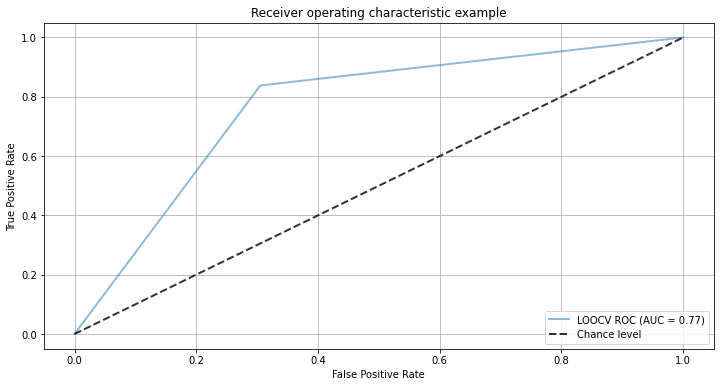

In [ ]:
calcROC(XWelch, y)

In [ ]:
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []
ypredlist = []
for train_index, test_index in cv.split(XWelch):
    X_train, X_test = XWelch.iloc[train_index], XWelch.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)  
    ypredlist.append(y_pred)
    #f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    #accuracy_scores.append(accuracy_score(y_test, y_pred))
    #precision_scores.append(precision_score(y_test, y_pred))

print(ypredlist)
print(ypredlist.count(0))
print(ypredlist.count(1))
#print("F1-Score: {:.2f}%".format(sum(f1_scores)/len(f1_scores)*100))
print("Recall: {:.2f}%".format(sum(recall_scores)/len(recall_scores)*100))
#print("Accuracy: {:.2f}%".format(sum(accuracy_scores)/len(accuracy_scores)*100))
#print("Precision: {:.2f}%".format(sum(precision_scores)/len(precision_scores)*100))


In [ ]:
f1_scores = []
recall_scores = []
precision_scores = []
ypredlist = []
for train_index, test_index in cv.split(XWelch):
    X_train, X_test = XWelch.iloc[train_index], XWelch.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
    
    model.fit(X_resampled, y_resampled)
    
    y_pred = model.predict(X_test)
    ypredlist.append(y_pred[0])
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
print(ypredlist)
print(ypredlist.count(0))
print(ypredlist.count(1))   
print("F1-Score: {:.2f}%".format(sum(f1_scores)/len(f1_scores)*100))
print("Recall: {:.2f}%".format(sum(recall_scores)/len(recall_scores)*100))
print("Precision: {:.2f}%".format(sum(precision_scores)/len(precision_scores)*100))

In [ ]:
def gerarResultadosCross(X, y):
  resultados = []
  for modelname, Model, params_list in models:
      for params in params_list:
          model = Model(**params)
          accuracy = "{0:.3f}".format(cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1).mean())
          f1score = "{0:.3f}".format(cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1).mean())
          recall = "{0:.3f}".format(cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1).mean())
          precision = "{0:.3f}".format(cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1).mean())      
          resultados.append((modelname, params, accuracy, f1score, recall, precision))
  print((tabulate(resultados, headers=["Modelo", "parametros", "acurácia", "F1-Score", "revocação", "precisão"])))

In [ ]:
gerarResultadosCross(XWelch, y)
gerarResultadosCross(bestWelch5A, y)
gerarResultadosCross(bestWelch10A, y)
gerarResultadosCross(bestWelch15A, y)

Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.784       0.534        0.522       0.53
KNN       {'n_neighbors': 3}         0.795       0.552        0.552       0.552
KNN       {'n_neighbors': 5}         0.784       0.549        0.549       0.549
SVM       {'kernel': 'linear'}       0.795       0.537        0.537       0.537
MLP       {'max_iter': 1000}         0.791       0.552        0.545       0.545
Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.728       0.511        0.515       0.507
KNN       {'n_neighbors': 3}         0.731       0.515        0.515       0.515
KNN       {'n_neighbors': 5}         0.78        0.541        0.541       0.541
SVM       {'kernel': 'linear'}       0.73

In [ ]:
gerarResultadosCross(bestWelch5M, y)
gerarResultadosCross(bestWelch10M, y)
gerarResultadosCross(bestWelch15M, y)
gerarResultadosCross(rfeWelch, y)

Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.802       0.545        0.537       0.545
KNN       {'n_neighbors': 3}         0.761       0.522        0.522       0.522
KNN       {'n_neighbors': 5}         0.761       0.541        0.541       0.541
SVM       {'kernel': 'linear'}       0.716       0.526        0.526       0.526
MLP       {'max_iter': 1000}         0.806       0.575        0.563       0.567
Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.795       0.537        0.537       0.545
KNN       {'n_neighbors': 3}         0.78        0.526        0.526       0.526
KNN       {'n_neighbors': 5}         0.757       0.526        0.526       0.526
SVM       {'kernel': 'linear'}       0.7

In [ ]:
def gerarResultadosCrossSMOTE(X, y):
  resultados = []
  for modelname, Model, params_list in models:
      for params in params_list:
          model = Model(**params)
          imba_pipeline = make_pipeline(sm, model)
          accuracy = "{0:.3f}".format(cross_val_score(imba_pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1).mean())
          f1score = "{0:.3f}".format(cross_val_score(imba_pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1).mean())
          recall = "{0:.3f}".format(cross_val_score(imba_pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1).mean())
          precision = "{0:.3f}".format(cross_val_score(imba_pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1).mean())      
          resultados.append((modelname, params, accuracy, f1score, recall, precision))
  print((tabulate(resultados, headers=["Modelo", "parametros", "acurácia", "F1-Score", "revocação", "precisão"])))

In [ ]:
gerarResultadosCrossSMOTE(XWelch, y)
gerarResultadosCrossSMOTE(bestWelch5A, y)
gerarResultadosCrossSMOTE(bestWelch10A, y)
gerarResultadosCrossSMOTE(bestWelch15A, y)

Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.813       0.537        0.519       0.526
KNN       {'n_neighbors': 3}         0.787       0.511        0.5         0.493
KNN       {'n_neighbors': 5}         0.795       0.493        0.489       0.5
SVM       {'kernel': 'linear'}       0.78        0.489        0.496       0.493
MLP       {'max_iter': 1000}         0.784       0.552        0.537       0.541
Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.716       0.481        0.515       0.5
KNN       {'n_neighbors': 3}         0.72        0.463        0.463       0.463
KNN       {'n_neighbors': 5}         0.72        0.451        0.459       0.463
SVM       {'kernel': 'linear'}       0.731  

In [ ]:
gerarResultadosCrossSMOTE(bestWelch5M, y)
gerarResultadosCrossSMOTE(bestWelch10M, y)
gerarResultadosCrossSMOTE(bestWelch15M, y)
gerarResultadosCrossSMOTE(rfeWelch, y)

Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.784       0.549        0.537       0.526
KNN       {'n_neighbors': 3}         0.78        0.5          0.5         0.493
KNN       {'n_neighbors': 5}         0.769       0.496        0.496       0.493
SVM       {'kernel': 'linear'}       0.724       0.455        0.47        0.47
MLP       {'max_iter': 1000}         0.795       0.541        0.541       0.53
Modelo    parametros              acurácia    F1-Score    revocação    precisão
--------  --------------------  ----------  ----------  -----------  ----------
DT        {}                         0.765       0.541        0.552       0.522
KNN       {'n_neighbors': 3}         0.806       0.5          0.515       0.507
KNN       {'n_neighbors': 5}         0.772       0.496        0.496       0.474
SVM       {'kernel': 'linear'}       0.735

In [ ]:
from sklearn.metrics import classification_report
target_names = ['False', 'True']
print(classification_report(y_test.values, predict, target_names=target_names))

In [ ]:
import seaborn as sn
data = {'y_Actual':    y_test.values.flatten(),
        'y_Predicted': predict
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()